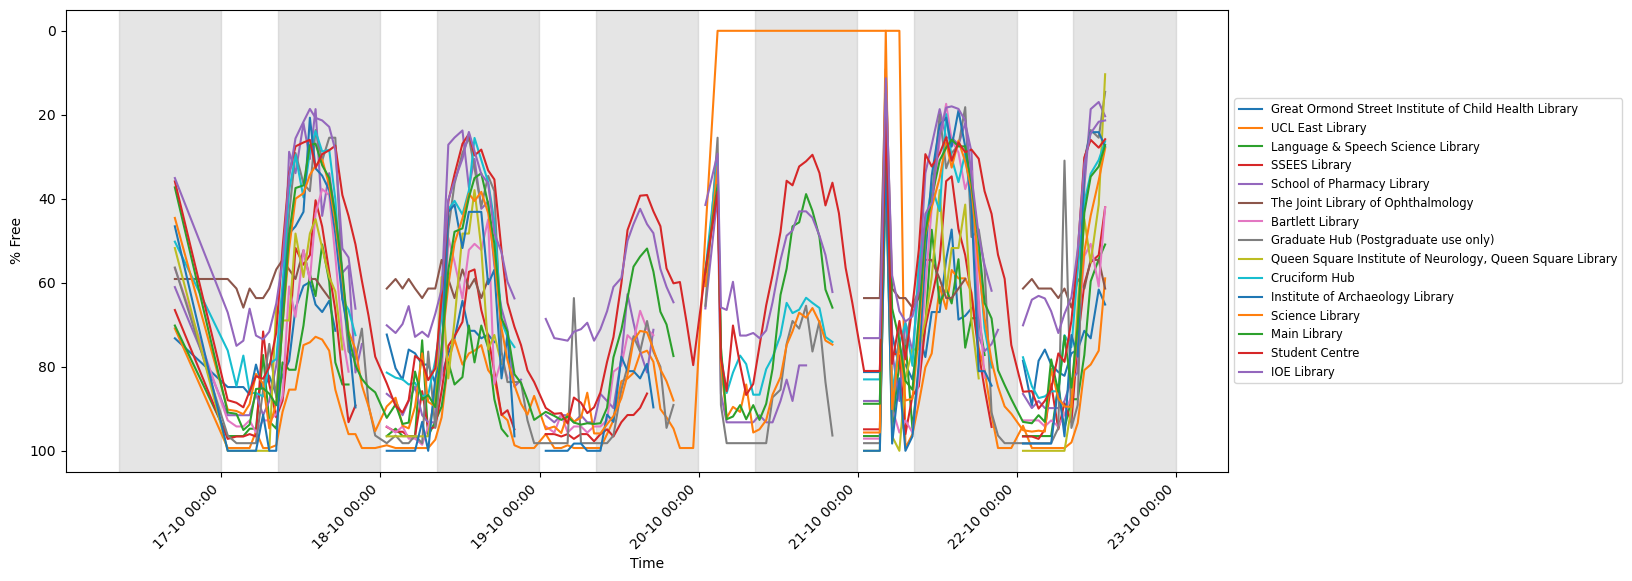

In [3]:
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import pandas as pd
import numpy as np
df=pd.read_csv('data/results.csv')
df['DateTime']=df['Date']+' '+df['Time']
df['DateTime']=pd.to_datetime(df['DateTime'],format='%Y-%m-%d %H:%M:%S.%f')
fig, ax = plt.subplots(figsize=(15, 6))
df.loc[df['% Free']==-1, '% Free'] = np.nan
for lib in df['Library'].unique():
    plt.plot('DateTime', '% Free', data=df[df['Library']==lib], label=lib)
ax.xaxis.set_major_formatter(DateFormatter('%d-%m %H:%M'))
plt.xlabel('Time')
plt.ylabel('% Free')
plt.xticks(rotation=45, ha='right')
plt.legend()
for date in df['DateTime'].dt.date.unique():
    start_time = pd.to_datetime(f"{date} 08:30:00")
    end_time = pd.to_datetime(f"{date} 23:59:00")
    plt.axvspan(start_time, end_time, color='darkgray', alpha=0.3)  
ax.invert_yaxis()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')